# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [35]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [36]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_raw.munResLat.sort_values()

25681   -13.49976
25927   -13.49976
25553   -13.49976
11425   -13.49976
25965   -13.49976
           ...   
19898    -8.76889
19899    -8.76889
19877    -8.76889
7972     -8.76889
1863          NaN
Name: munResLat, Length: 27028, dtype: float64

In [5]:
# Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5
cat_lat = pd.cut(sinasc_raw['munResLat'], [-13.49976, -10.5, -8.76889])
cat_lat

0        (-13.5, -10.5]
1        (-13.5, -10.5]
2        (-13.5, -10.5]
3        (-13.5, -10.5]
4        (-13.5, -10.5]
              ...      
27023    (-13.5, -10.5]
27024    (-13.5, -10.5]
27025    (-13.5, -10.5]
27026    (-13.5, -10.5]
27027    (-13.5, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-13.5, -10.5] < (-10.5, -8.769]]

In [6]:
# aplique o groupby usando essas faixas como chave
# realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia 

sinasc_raw1 = sinasc_raw[['QTDFILVIVO', 'QTDFILMORT']]

sinasc_raw1.groupby(cat_lat).agg([('soma',sum), 
                                  ('media','mean'), 
                                  ('minimo',min), 
                                  ('maximo',max), 
                                  ('mediana','median'),
                                  ('desvio padrao', 'std'),
                                  ('variancia','var')])

QTDFILVIVO                                                \
                      soma     media minimo maximo mediana desvio padrao   
munResLat                                                                  
(-13.5, -10.5]     12539.0  0.981373    0.0   30.0     1.0      1.139172   
(-10.5, -8.769]    14226.0  1.129317    0.0   12.0     1.0      1.198613   

                          QTDFILMORT                                  \
                variancia       soma     media minimo maximo mediana   
munResLat                                                              
(-13.5, -10.5]   1.297712     3084.0  0.242396    0.0   28.0     0.0   
(-10.5, -8.769]  1.436674     3538.0  0.291770    0.0    9.0     0.0   

                                         
                desvio padrao variancia  
munResLat                                
(-13.5, -10.5]       0.599642  0.359570  
(-10.5, -8.769]      0.627856  0.394204

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
sinasc_raw.munResArea.sort_values()

5469       459.978
17881      459.978
19133      459.978
5385       459.978
17832      459.978
           ...    
7348     34096.394
20069    34096.394
7342     34096.394
20709    34096.394
1863           NaN
Name: munResArea, Length: 27028, dtype: float64

In [8]:
cat_area = pd.cut(sinasc_raw['munResArea'], [459.978, 3000, 34096.394])
cat_area

0        (3000.0, 34096.394]
1        (3000.0, 34096.394]
2        (3000.0, 34096.394]
3        (3000.0, 34096.394]
4        (3000.0, 34096.394]
                ...         
27023    (3000.0, 34096.394]
27024    (3000.0, 34096.394]
27025    (3000.0, 34096.394]
27026    (3000.0, 34096.394]
27027      (459.978, 3000.0]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(459.978, 3000.0] < (3000.0, 34096.394]]

In [9]:
sinasc_raw2 = sinasc_raw[['QTDPARTNOR', 'QTDPARTCES']]

sinasc_raw2.groupby(cat_area).agg([('soma',sum), 
                                  ('media','mean'), 
                                  ('minimo',min), 
                                  ('maximo',max), 
                                  ('mediana','median'),
                                  ('desvio padrao', 'std'),
                                  ('variancia','var')])

QTDPARTNOR                                                \
                          soma     media minimo maximo mediana desvio padrao   
munResArea                                                                     
(459.978, 3000.0]       1898.0  0.373255    0.0   10.0     0.0      0.856498   
(3000.0, 34096.394]    12659.0  0.632982    0.0   41.0     0.0      1.278932   

                              QTDPARTCES                                  \
                    variancia       soma     media minimo maximo mediana   
munResArea                                                                 
(459.978, 3000.0]    0.733588     2910.0  0.571934    0.0    5.0     0.0   
(3000.0, 34096.394]  1.635668    10184.0  0.507070    0.0   12.0     0.0   

                                             
                    desvio padrao variancia  
munResArea                                   
(459.978, 3000.0]        0.748719  0.560580  
(3000.0, 34096.394]      0.744981  0.554997

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
cat_alt = pd.qcut(sinasc_raw['munResAlt'], 2)
cat_alt

0        (153.0, 595.0]
1        (153.0, 595.0]
2        (153.0, 595.0]
3        (153.0, 595.0]
4        (153.0, 595.0]
              ...      
27023    (153.0, 595.0]
27024    (153.0, 595.0]
27025    (153.0, 595.0]
27026    (153.0, 595.0]
27027    (153.0, 595.0]
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(84.999, 153.0] < (153.0, 595.0]]

In [11]:
sinasc_raw3 = sinasc_raw[['QTDPARTNOR', 'QTDPARTCES']]

sinasc_raw3.groupby(cat_alt).agg([('soma',sum), 
                                  ('media','mean'), 
                                  ('minimo',min), 
                                  ('maximo',max), 
                                  ('mediana','median'),
                                  ('desvio padrao', 'std'),
                                  ('variancia','var')])

QTDPARTNOR                                                \
                      soma     media minimo maximo mediana desvio padrao   
munResAlt                                                                  
(84.999, 153.0]     9307.0  0.780527    0.0   40.0     0.0      1.362645   
(153.0, 595.0]      5264.0  0.398064    0.0   41.0     0.0      1.018270   

                          QTDPARTCES                                  \
                variancia       soma     media minimo maximo mediana   
munResAlt                                                              
(84.999, 153.0]  1.856801     5697.0  0.475225    0.0   12.0     0.0   
(153.0, 595.0]   1.036874     7439.0  0.561519    0.0   12.0     0.0   

                                         
                desvio padrao variancia  
munResAlt                                
(84.999, 153.0]      0.736925  0.543058  
(153.0, 595.0]       0.752433  0.566156

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [37]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
dados_ro

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830
5,Buritis,Ariquemes,0.616,0.6199,726000
6,Cabixi,Vilhena,0.650,0.5887,113031
7,Cacaulândia,Ariquemes,0.646,0.5721,116635
8,Cacoal,Cacoal,0.718,0.7111,2261644
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821


In [38]:
# dicionário com a região imediata de cada município 
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))
regioes_map

{"Alta Floresta D'Oeste": 'Cacoal',
 'Alto Alegre dos Parecis': 'Cacoal',
 'Alto Paraíso': 'Ariquemes',
 "Alvorada D'Oeste": 'Ji-Paraná',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cabixi': 'Vilhena',
 'Cacaulândia': 'Ariquemes',
 'Cacoal': 'Cacoal',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Candeias do Jamari': 'Porto Velho',
 'Castanheiras': 'Cacoal',
 'Cerejeiras': 'Vilhena',
 'Chupinguaia': 'Vilhena',
 'Colorado do Oeste': 'Vilhena',
 'Corumbiara': 'Vilhena',
 'Costa Marques': 'Ji-Paraná',
 'Cujubim': 'Ariquemes',
 "Espigão D'Oeste": 'Cacoal',
 'Governador Jorge Teixeira': 'Jaru',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Jaru': 'Jaru',
 'Ji-Paraná': 'Ji-Paraná',
 "Machadinho D'Oeste": 'Jaru',
 'Ministro Andreazza': 'Cacoal',
 'Mirante da Serra': 'Ji-Paraná',
 'Monte Negro': 'Ariquemes',
 "Nova Brasilândia D'Oeste": 'Cacoal',
 'Nova Mamoré': 'Porto Velho',
 'Nova União': 'Ji-Paraná',
 'Novo Horizonte do Oeste': 'Cacoal',
 'Ouro Preto do Oeste'

In [42]:
# categorizar municípios por região imediata e calcular idade média das mães

sinasc_raw4 = sinasc_raw[['munResNome', 'IDADEMAE']]
reg_imediata = sinasc_raw4.set_index('munResNome')
reg_imediata.groupby(regioes_map).mean()

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


<Axes: xlabel='munResNome'>

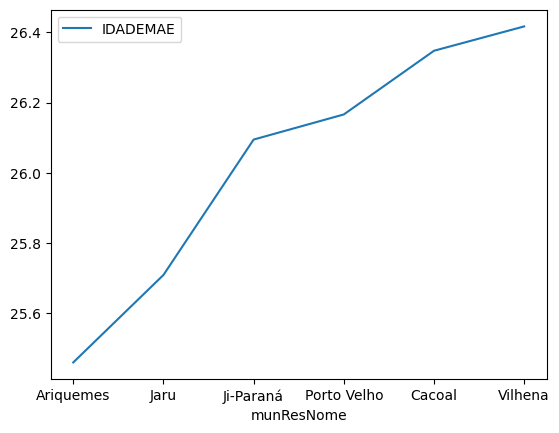

In [73]:
reg_imediata.groupby(regioes_map).mean().sort_values('IDADEMAE').plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [49]:
# criar coluna com categorias de IDH 
dados_ro.loc[dados_ro['idh'] >= 0.7, 'IDH'] = 'IDH alto'
dados_ro.loc[(dados_ro['idh'] < 0.7) & (dados_ro['idh'] >= 0.6), 'IDH'] = 'IDH médio'
dados_ro.loc[dados_ro['idh'] < 0.6, 'IDH'] = 'IDH baixo'

dados_ro

,municipio,regiao,idh,ifdm,pib,IDH
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH médio
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH baixo
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH médio
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH médio
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH alto
5,Buritis,Ariquemes,0.616,0.6199,726000,IDH médio
6,Cabixi,Vilhena,0.650,0.5887,113031,IDH médio
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,IDH médio
8,Cacoal,Cacoal,0.718,0.7111,2261644,IDH alto
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,IDH baixo


In [50]:
# dicionário com a categoria de IDH de cada município

idh = dict(zip(dados_ro['municipio'], dados_ro['IDH']))
idh

{"Alta Floresta D'Oeste": 'IDH médio',
 'Alto Alegre dos Parecis': 'IDH baixo',
 'Alto Paraíso': 'IDH médio',
 "Alvorada D'Oeste": 'IDH médio',
 'Ariquemes': 'IDH alto',
 'Buritis': 'IDH médio',
 'Cabixi': 'IDH médio',
 'Cacaulândia': 'IDH médio',
 'Cacoal': 'IDH alto',
 'Campo Novo de Rondônia': 'IDH baixo',
 'Candeias do Jamari': 'IDH médio',
 'Castanheiras': 'IDH médio',
 'Cerejeiras': 'IDH médio',
 'Chupinguaia': 'IDH médio',
 'Colorado do Oeste': 'IDH médio',
 'Corumbiara': 'IDH médio',
 'Costa Marques': 'IDH médio',
 'Cujubim': 'IDH médio',
 "Espigão D'Oeste": 'IDH médio',
 'Governador Jorge Teixeira': 'IDH baixo',
 'Guajará-Mirim': 'IDH médio',
 'Itapuã do Oeste': 'IDH médio',
 'Jaru': 'IDH médio',
 'Ji-Paraná': 'IDH alto',
 "Machadinho D'Oeste": 'IDH baixo',
 'Ministro Andreazza': 'IDH médio',
 'Mirante da Serra': 'IDH médio',
 'Monte Negro': 'IDH médio',
 "Nova Brasilândia D'Oeste": 'IDH médio',
 'Nova Mamoré': 'IDH baixo',
 'Nova União': 'IDH baixo',
 'Novo Horizonte do Oeste

In [63]:
# categorizar municípios por IDH e calcular idade média das mães e dos pais 

sinasc_raw5 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
cat_idh = sinasc_raw5.set_index('munResNome')
cat_idh.groupby(idh).mean().sort_values('IDADEMAE')

,IDADEMAE,IDADEPAI
munResNome,,
IDH baixo,25.326944,30.617450
IDH médio,25.884855,31.207092
IDH alto,26.280332,31.074091


Text(0, 0.5, 'Idade média')

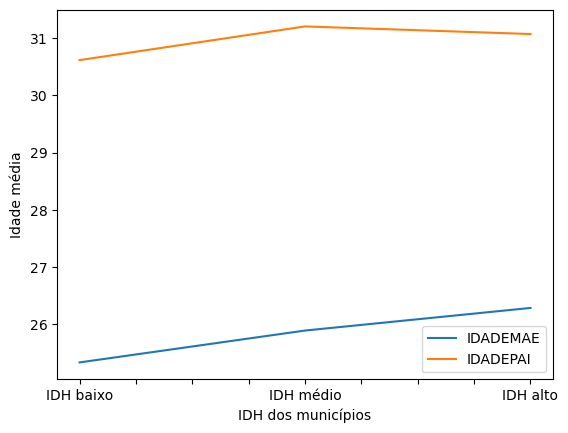

In [69]:
cat_idh.groupby(idh).mean().sort_values('IDADEMAE').plot()
plt.xlabel('IDH dos municípios')
plt.ylabel('Idade média')

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [74]:
# criar coluna com categorias de IFDM
dados_ro.loc[dados_ro['ifdm'] >= 0.8, 'IFDM'] = 'IFDM alto'
dados_ro.loc[(dados_ro['ifdm'] < 0.8) & (dados_ro['ifdm'] >= 0.6), 'IFDM'] = 'IFDM moderado'
dados_ro.loc[(dados_ro['ifdm'] < 0.6) & (dados_ro['ifdm'] >= 0.4), 'IFDM'] = 'IFDM regular'
dados_ro.loc[dados_ro['ifdm'] < 0.4, 'IFDM'] = 'IFDM baixo'

dados_ro

,municipio,regiao,idh,ifdm,pib,IDH,IFDM
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH médio,IFDM moderado
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH baixo,IFDM regular
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH médio,IFDM regular
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH médio,IFDM regular
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH alto,IFDM moderado
5,Buritis,Ariquemes,0.616,0.6199,726000,IDH médio,IFDM moderado
6,Cabixi,Vilhena,0.650,0.5887,113031,IDH médio,IFDM regular
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,IDH médio,IFDM regular
8,Cacoal,Cacoal,0.718,0.7111,2261644,IDH alto,IFDM moderado
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,IDH baixo,IFDM regular


In [75]:
# dicionário com a categoria de IFDM de cada município

ifdm = dict(zip(dados_ro['municipio'], dados_ro['IFDM']))
ifdm

{"Alta Floresta D'Oeste": 'IFDM moderado',
 'Alto Alegre dos Parecis': 'IFDM regular',
 'Alto Paraíso': 'IFDM regular',
 "Alvorada D'Oeste": 'IFDM regular',
 'Ariquemes': 'IFDM moderado',
 'Buritis': 'IFDM moderado',
 'Cabixi': 'IFDM regular',
 'Cacaulândia': 'IFDM regular',
 'Cacoal': 'IFDM moderado',
 'Campo Novo de Rondônia': 'IFDM regular',
 'Candeias do Jamari': 'IFDM moderado',
 'Castanheiras': 'IFDM regular',
 'Cerejeiras': 'IFDM moderado',
 'Chupinguaia': 'IFDM moderado',
 'Colorado do Oeste': 'IFDM moderado',
 'Corumbiara': 'IFDM regular',
 'Costa Marques': 'IFDM regular',
 'Cujubim': 'IFDM regular',
 "Espigão D'Oeste": 'IFDM regular',
 'Governador Jorge Teixeira': 'IFDM regular',
 'Guajará-Mirim': 'IFDM regular',
 'Itapuã do Oeste': 'IFDM regular',
 'Jaru': 'IFDM moderado',
 'Ji-Paraná': 'IFDM moderado',
 "Machadinho D'Oeste": 'IFDM regular',
 'Ministro Andreazza': 'IFDM regular',
 'Mirante da Serra': 'IFDM regular',
 'Monte Negro': 'IFDM moderado',
 "Nova Brasilândia D'Oeste

In [79]:
# categorizar municípios por IFDM e calcular peso médio dos bebês e APGAR médio 

sinasc_raw6 = sinasc_raw[['munResNome', 'PESO', 'APGAR5']]
cat_ifdm = sinasc_raw6.set_index('munResNome')
cat_ifdm.groupby(ifdm).mean()

,PESO,APGAR5
munResNome,,
IFDM moderado,3243.420532,9.185394
IFDM regular,3242.203306,9.152066


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [80]:
# criar coluna com categorias de PIB
dados_ro.loc[dados_ro['pib'] >= 1164877, 'PIB'] = '1 BI'
dados_ro.loc[(dados_ro['pib'] < 1164877) & (dados_ro['pib'] >= 507000), 'PIB'] = '500 MI'
dados_ro.loc[(dados_ro['pib'] < 507000) & (dados_ro['pib'] >= 335000), 'PIB'] = '300 MI'
dados_ro.loc[(dados_ro['pib'] < 335000) & (dados_ro['pib'] >= 204098), 'PIB'] = '200 MI'
dados_ro.loc[(dados_ro['pib'] < 204098) & (dados_ro['pib'] >= 105208), 'PIB'] = '100 MI'
dados_ro.loc[dados_ro['pib'] < 105208, 'PIB'] = '100 mi'

dados_ro

,municipio,regiao,idh,ifdm,pib,IDH,IFDM,PIB
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH médio,IFDM moderado,300 MI
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH baixo,IFDM regular,200 MI
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH médio,IFDM regular,300 MI
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH médio,IFDM regular,200 MI
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH alto,IFDM moderado,1 BI
5,Buritis,Ariquemes,0.616,0.6199,726000,IDH médio,IFDM moderado,500 MI
6,Cabixi,Vilhena,0.650,0.5887,113031,IDH médio,IFDM regular,100 MI
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,IDH médio,IFDM regular,100 MI
8,Cacoal,Cacoal,0.718,0.7111,2261644,IDH alto,IFDM moderado,1 BI
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,IDH baixo,IFDM regular,200 MI


In [82]:
# dicionário com a categoria de PIB de cada município

pib = dict(zip(dados_ro['municipio'], dados_ro['PIB']))
pib

{"Alta Floresta D'Oeste": '300 MI',
 'Alto Alegre dos Parecis': '200 MI',
 'Alto Paraíso': '300 MI',
 "Alvorada D'Oeste": '200 MI',
 'Ariquemes': '1 BI',
 'Buritis': '500 MI',
 'Cabixi': '100 MI',
 'Cacaulândia': '100 MI',
 'Cacoal': '1 BI',
 'Campo Novo de Rondônia': '200 MI',
 'Candeias do Jamari': '500 MI',
 'Castanheiras': '100 mi',
 'Cerejeiras': '500 MI',
 'Chupinguaia': '100 MI',
 'Colorado do Oeste': '300 MI',
 'Corumbiara': '100 MI',
 'Costa Marques': '100 MI',
 'Cujubim': '300 MI',
 "Espigão D'Oeste": '500 MI',
 'Governador Jorge Teixeira': '100 MI',
 'Guajará-Mirim': '500 MI',
 'Itapuã do Oeste': '100 MI',
 'Jaru': '1 BI',
 'Ji-Paraná': '1 BI',
 "Machadinho D'Oeste": '500 MI',
 'Ministro Andreazza': '100 MI',
 'Mirante da Serra': '100 MI',
 'Monte Negro': '200 MI',
 "Nova Brasilândia D'Oeste": '300 MI',
 'Nova Mamoré': '500 MI',
 'Nova União': '100 mi',
 'Novo Horizonte do Oeste': '100 MI',
 'Ouro Preto do Oeste': '500 MI',
 'Parecis': '100 mi',
 'Pimenta Bueno': '1 BI',
 'P

In [90]:
# categorizar municípios por PIB e calcular idade média das mães e pais 

sinasc_raw7 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
cat_pib = sinasc_raw7.set_index('munResNome')
cat_pib.groupby(pib).mean()

,IDADEMAE,IDADEPAI
munResNome,,
1 BI,26.265562,31.108387
100 MI,25.662910,31.602102
100 mi,26.515081,31.585185
200 MI,25.323204,30.386441
300 MI,25.833511,30.183386
500 MI,25.782528,31.322907


<Axes: xlabel='munResNome'>

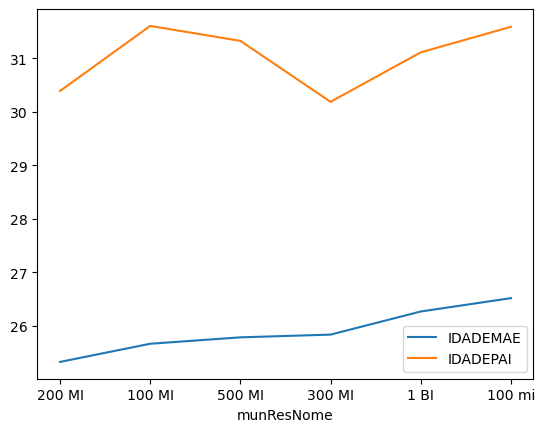

In [92]:
cat_pib.groupby(pib).mean().sort_values('IDADEMAE').plot()

<Axes: xlabel='munResNome'>

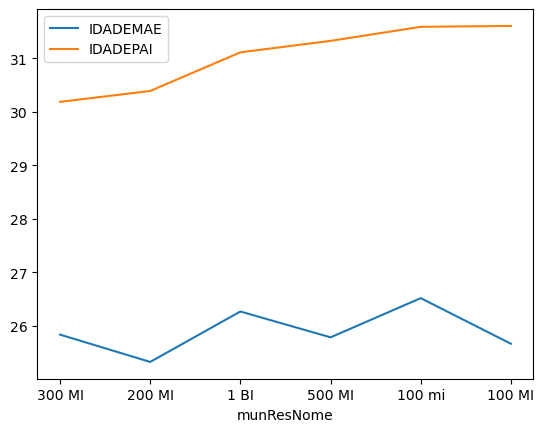

In [93]:
cat_pib.groupby(pib).mean().sort_values('IDADEPAI').plot()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- A quantidade máxima de filhos (vivos e mortos) é maior em latitude entre -13.5 e -10.5 (comparado com latitude entre -10.5 e -8.769). Contudo, parece haver um erro nos dados, considerando que o máximo de filhos vivos de uma mulher é de 30 na primeira faixa de latitude e de 28 na segunda (valores que não condizem com a realidade e tem grandes chances de ser um erro).
- O número (máximo) tanto de partos normais, quanto de cesáreas, aumenta com o aumento da área do município. Contudo, os partos normais apresentam um aumento mais significativo (de 10 para 41), enquanto as cesáreas apresentam aumento mais discreto (de 5 para 12). 
- A idade média das mães aumenta com o aumento do IDH (nos municípios com IDH mais alto a média de idade das mães é maior). 
- A idade média das mães por regiões imediatadas não varia muito (aproximadamente 1 ano de variação). 
- Os municípios de RO apresentam IFDM muito próximos, todos são moderados ou regulares. Os parâmetros PESO e APGAR5 são praticamente idênticos quando comparados por IFDM. IFDM não parece ser um bom parâmetro para comparações. 
- O PIB não parece interferir nas idades médias dos pais e mães. 